In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


In [7]:
columns = ["target dim","origin dim","base_err","target_err"]
df = pd.read_csv("res99_9.csv",header=None, names=columns)

In [8]:
df.head()

,target dim,origin dim,base_err,target_err
0,2.0,50.0,0.0471,0.3951
1,3.0,50.0,0.0471,0.4137
2,4.0,50.0,0.0471,0.4181
3,5.0,50.0,0.0471,0.4337
4,6.0,50.0,0.0471,0.4185


In [9]:
df["t/d"] = df["target dim"] / df["origin dim"]

In [16]:
df.head()

,target dim,origin dim,base_err,target_err,t/d
0,2.0,50.0,0.0471,0.3951,0.04
1,3.0,50.0,0.0471,0.4137,0.06
2,4.0,50.0,0.0471,0.4181,0.08
3,5.0,50.0,0.0471,0.4337,0.10
4,6.0,50.0,0.0471,0.4185,0.12


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target dim  17500 non-null  float64
 1   origin dim  17500 non-null  float64
 2   base_err    17500 non-null  float64
 3   target_err  17500 non-null  float64
 4   t/d         17500 non-null  float64
dtypes: float64(5)
memory usage: 683.7 KB


<Axes: xlabel='t/d'>

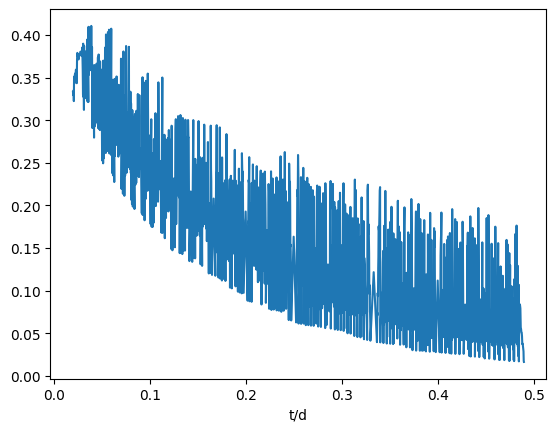

In [20]:
df.groupby(["t/d"]).mean()["target_err"].plot()